In [103]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector

In [104]:
svsim = Aer.get_backend('aer_simulator') 

<IPython.core.display.Latex object>

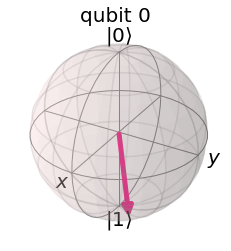

In [105]:
qc = QuantumCircuit(3, 2)
to_transport = random_statevector(2)
display(array_to_latex(to_transport, prefix="transport ="))
plot_bloch_multivector(to_transport)

     ┌───────────────────────────────────────────────┐               ┌───┐┌─┐»
q_0: ┤ Initialize(0.36904+0.012471j,0.6936+0.61853j) ├────────────■──┤ H ├┤M├»
     └──────────────┬─────────────────┬──────────────┘┌───┐     ┌─┴─┐└┬─┬┘└╥┘»
q_1: ───────────────┤ Initialize(1,0) ├───────────────┤ H ├──■──┤ X ├─┤M├──╫─»
                    ├─────────────────┤               └───┘┌─┴─┐└───┘ └╥┘  ║ »
q_2: ───────────────┤ Initialize(1,0) ├────────────────────┤ X ├───────╫───╫─»
                    └─────────────────┘                    └───┘       ║   ║ »
c: 2/══════════════════════════════════════════════════════════════════╩═══╩═»
                                                                       1   0 »
«                           
«q_0: ──────────────────────
«                           
«q_1: ──────────────────────
«        ┌───┐      ┌───┐   
«q_2: ───┤ X ├──────┤ Z ├───
«        └─╥─┘      └─╥─┘   
«     ┌────╨────┐┌────╨────┐
«c: 2/╡ c_1=0x1 ╞╡ c_0=0x1 ╞
«     └─────────┘└─────────┘

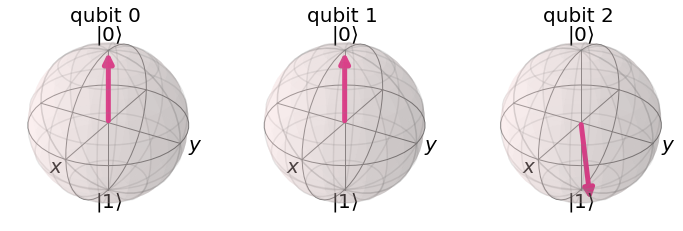

In [106]:
qc.initialize(to_transport, 0)
qc.initialize([1, 0], 1)
qc.initialize([1, 0], 2)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.x(2).c_if(1, 1)
qc.z(2).c_if(0, 1)
print(qc.draw())
qc.save_statevector()
sv = svsim.run(qc).result().get_statevector()
plot_bloch_multivector(sv)